In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import pickle
sys.path.append(r"C:\Users\Alireza\Documents\Git\Cosine-Project")
from inSilico_experiments.utils.pothook_analysis_lib import *
from torchvision.transforms import ToTensor, ToPILImage, Pad
from torchvision.utils import make_grid
import seaborn as sns

In [2]:
# load metadata 
data_path = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\post_processed"

metadata_df_cosine_intralayer = pd.read_hdf(os.path.join(data_path, "metadata_df_inter_layer_with_normalized_dist.h5"), key="metadata_df")
metadata_df_cosine_crosslayer = pd.read_hdf(os.path.join(data_path, "metadata_df_intera_layer_with_normalized_dist.h5"), key="metadata_df")
# concatenate the two dataframes
metadata_df_cosine = pd.concat([metadata_df_cosine_intralayer, metadata_df_cosine_crosslayer], ignore_index=False)
#metadata_df_cosine = metadata_df_cosine_most
save_root = r"N:\PonceLab\Users\Alireza\insilico_experiments\Alexnet_remonstration_across_different_layer_062023\results"


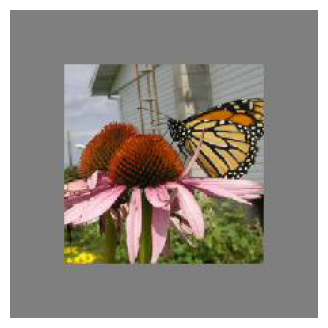

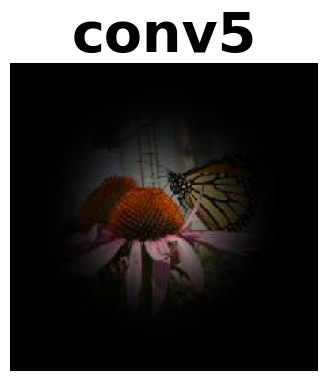

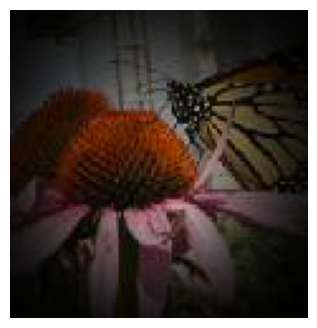

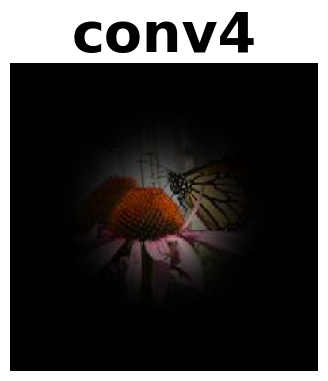

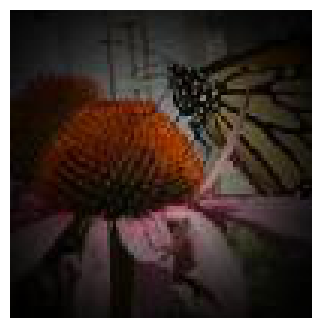

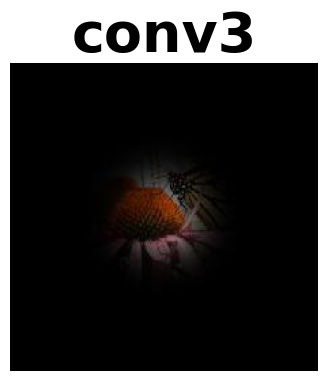

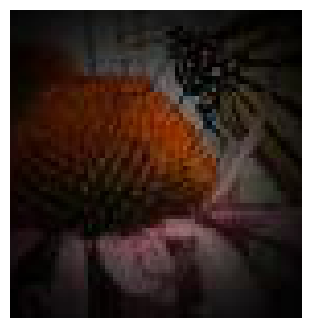

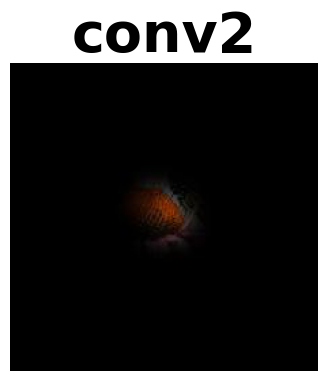

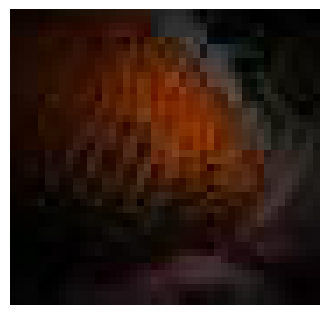

In [10]:
# print one of the target images and the its recontruction for each layer and population size (load all regen images)
image_name = "imagenet_8"
layer_short_list = ["conv5", "conv4", "conv3", "conv2"]
similarity_metric_list = ["cosine", "MSE"]
pop_size =  128
RF_treshold = 2
pop_resampling_id = 0
smpling_type = "most"

output_type = "target_img_RF_masked"
gen_image_type = "best_gen_imgs_RF_masked"


save_path = os.path.join(save_root, f"visalization_croping")
save_path = os.path.join(save_path, image_name)
os.makedirs(save_path, exist_ok=True)
similarity_metric = similarity_metric_list[1]
    
target_image_no_mask = load_image_tsr(metadata_df_cosine, trget_imge_name=image_name,
                                layer_short="conv5", output_type="target_img", pop_size=pop_size,
                                sub_pop_type="most", pop_resampling_id=pop_resampling_id)
fig, ax = plt.subplots(1, figsize=(4, 4))
ax.imshow(ToPILImage()(target_image_no_mask))
ax.axis("off")  
plt.savefig(os.path.join(save_path, f"{image_name}_target_no_mask.png"), bbox_inches="tight", pad_inches=0)

for i, layer_short in enumerate(layer_short_list):
    target_image = load_image_tsr(metadata_df_cosine, trget_imge_name=image_name,
                                layer_short=layer_short, output_type=output_type, pop_size=pop_size,
                                sub_pop_type="most", pop_resampling_id=pop_resampling_id)
    fig, ax = plt.subplots(1, figsize=(4, 4))
    ax.imshow(ToPILImage()(target_image))
    ax.set_title(f"{layer_short}", fontsize=40, fontweight="bold")
    ax.axis("off")  
    plt.savefig(os.path.join(save_path, f"{image_name}_{layer_short}_target_mask.png"), bbox_inches="tight", pad_inches=0)

    rf_filter = np.load(os.path.join(data_path, "rf_filters", f"{layer_short}_{pop_size}.npz"))
    target_image_croped = image_rf_crop(target_image, (int(rf_filter["sigma_y"]*RF_treshold*2),
                                                    int(rf_filter["sigma_x"]*RF_treshold*2)))
    fig, ax = plt.subplots(1, figsize=(4, 4))
    ax.imshow(ToPILImage()(target_image_croped))
    ax.axis("off")  
    plt.savefig(os.path.join(save_path, f"{image_name}_{layer_short}_target_mask_croped.png"), bbox_inches="tight", pad_inches=0)